[The challenges of modeling churn](https://neilpatel.com/blog/modeling-churn/)

[Why churn analysis is valuable for companies](https://www.datascience.com/blog/what-is-a-churn-analysis-and-why-is-it-valuable-for-business)

[Git social](https://github.com/VinaySagar92/Git-Social)

[Azure revenue](https://www.forbes.com/sites/bobevans1/2018/10/29/1-microsoft-beats-amazon-in-12-month-cloud-revenue-26-7-billion-to-23-4-billion-ibm-third/#2c9e12912bf1)

[Why did Microsoft pay so much for GitHub](https://hbr.org/2018/06/why-microsoft-is-willing-to-pay-so-much-for-github)


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns

import helper as h

[Group each in BigQuery](https://stackoverflow.com/questions/22600299/understanding-resources-exceeded-during-query-execution-with-group-each-by-in)

In [2]:
user_data = h.get_merged_data(appName='data-exploration', year='2016').toPandas()
user_data.head().transpose()

% of users dropped 4.698526359485271


,0,1,2,3,4
login,0loky0,13246864965,1xPdd,2582056905xy,277542952
followers_count,0,0,0,2,1
following_count,1,0,0,6,28
blog,0,0,0,0,0
company,0,0,0,0,0
created_at,2011-05-24 20:15:25+00:00,2016-04-14 10:04:50+00:00,2014-07-11 03:45:56+00:00,2014-04-24 14:51:26+00:00,2016-03-16 03:17:58+00:00
public_repos_count,7,3,0,35,1
public_gists_count,0,0,0,0,0
hireable,1,0,0,0,0
updated_at,2019-01-09 15:03:59+00:00,2018-08-02 07:48:44+00:00,2018-12-16 00:55:16+00:00,2018-10-18 01:47:18+00:00,2017-08-14 19:48:16+00:00


In [3]:
user_data = h.add_time_columns(user_data)
user_data.dtypes

login                                          object
followers_count                                 int32
following_count                                 int32
blog                                            int32
company                                         int32
created_at                             datetime64[ns]
public_repos_count                            float64
public_gists_count                            float64
hireable                                        int32
updated_at                                     object
time_between_first_last_event                 float64
last_event                             datetime64[ns]
first_event                            datetime64[ns]
frequency                                       int32
second_period_event_count                       int32
CommitCommentEvent_count                        int32
CreateEvent_count                               int32
DeleteEvent_count                               int32
ForkEvent_count             

In [4]:
user_data = user_data.dropna()
user_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers_count,183575.0,4.105085,36.119127,0.000000,0.000000,0.000000,2.000000,4443.000000
following_count,183575.0,4.059638,75.544398,0.000000,0.000000,0.000000,2.000000,19767.000000
blog,183575.0,0.166531,0.372558,0.000000,0.000000,0.000000,0.000000,1.000000
company,183575.0,0.155757,0.362625,0.000000,0.000000,0.000000,0.000000,1.000000
public_repos_count,183575.0,10.891042,27.117144,0.000000,1.000000,4.000000,12.000000,2196.000000
public_gists_count,183575.0,1.247365,8.036739,0.000000,0.000000,0.000000,0.000000,766.000000
hireable,183575.0,0.097600,0.296774,0.000000,0.000000,0.000000,0.000000,1.000000
time_between_first_last_event,183575.0,46.499179,51.098759,0.000000,0.047014,23.519132,90.530289,152.971169
frequency,183575.0,20.339643,30.665557,2.000000,3.000000,8.000000,23.000000,199.000000
second_period_event_count,183575.0,13.630930,28.725142,0.000000,0.000000,1.000000,13.000000,199.000000


/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


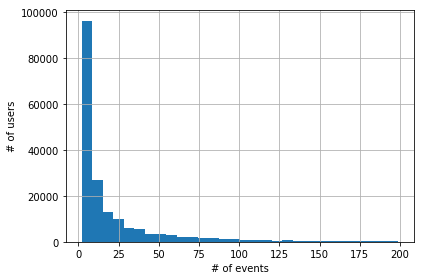

In [5]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

user_data.frequency.hist(ax=ax, bins=30)
ax.set_xlabel('# of events')
ax.set_ylabel('# of users')

fig.savefig('figures/number_of_events_firstHalf2016.png')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


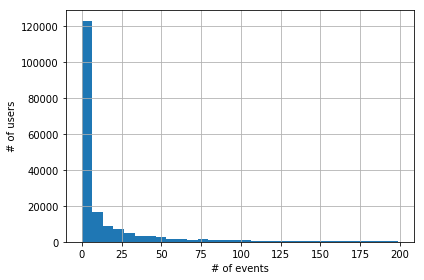

In [6]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)

user_data.second_period_event_count.hist(ax=ax, bins=30)
ax.set_xlabel('# of events')
ax.set_ylabel('# of users')

fig.savefig('figures/number_of_events_secondHalf2016.png')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d21b2b518>,
      dtype=object)

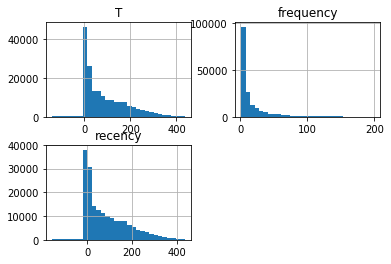

In [7]:
user_data[['frequency', 'T', 'recency']].hist(bins=30)

In [8]:
print('{0}% of users churned in second period'.format(
    np.round(np.sum(user_data.second_period_event_count < 1) / len(user_data) * 100, 2)))

47.6% of users churned in second period


Text(0, 0.5, '# of users')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


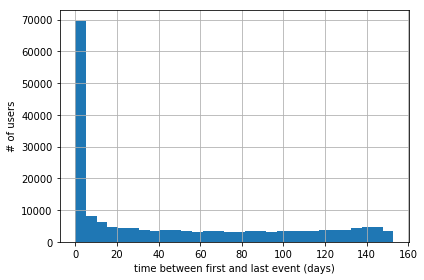

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(True)
user_data.time_between_first_last_event.hist(ax=ax, bins=30)
ax.set_xlabel('time between first and last event (days)')
ax.set_ylabel('# of users')


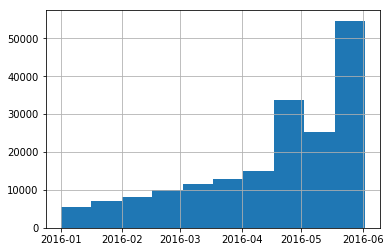

In [10]:
user_data.last_event.hist()

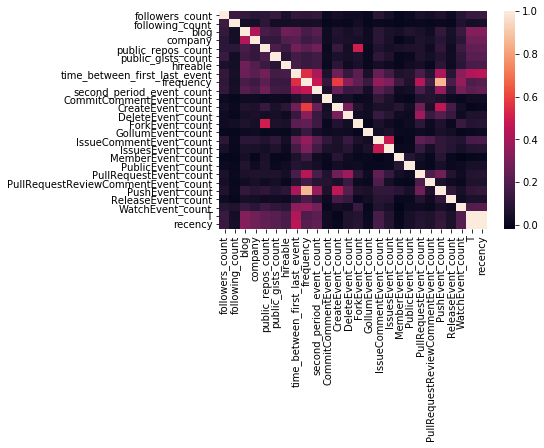

In [11]:
corr = user_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

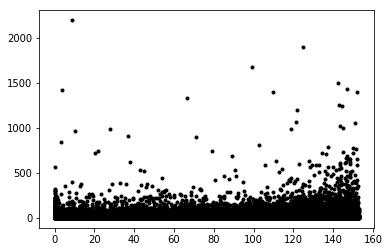

In [12]:
fig, ax = plt.subplots(1,1)

ax.plot(user_data.time_between_first_last_event, user_data.public_repos_count, 'k.')

In [13]:
churned = user_data[user_data.second_period_event_count == 0]
active = user_data[user_data.second_period_event_count > 0]

In [14]:
print('N churned {0}, N active {1}'.format(len(churned), len(active)))

N churned 87387, N active 96188


In [15]:
def plot_active_VS_churned(predictor='frequency'):
    fig, ax = plt.subplots(1,1)
    fig.set_tight_layout(True)

    ax.bar([1, 2], [churned[predictor].mean(), active[predictor].mean()], 
           yerr=[churned[predictor].std() / np.sqrt(len(churned)), 
                 churned[predictor].std() / np.sqrt(len(churned))])
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['churned', 'active'])
    ax.set_ylabel(predictor + ' (Jan-May 2016)')

    fig.savefig('figures/' + predictor + '_churnedVSactive.png')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


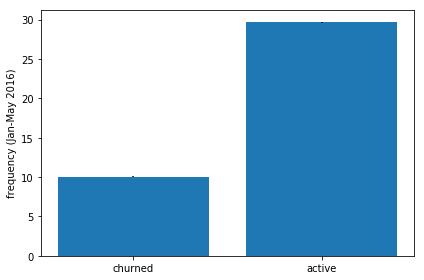

In [16]:
plot_active_VS_churned('frequency')

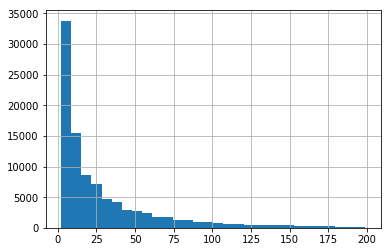

In [17]:
active.frequency.hist(bins=30)

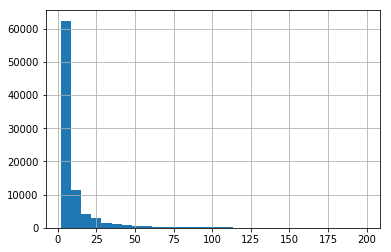

In [18]:
churned.frequency.hist(bins=30)

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


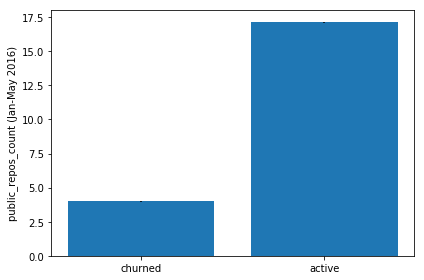

In [19]:
plot_active_VS_churned('public_repos_count')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


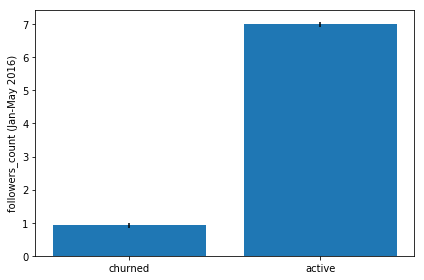

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


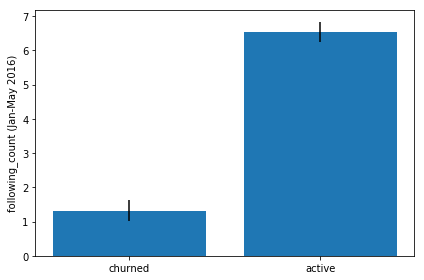

In [20]:
plot_active_VS_churned('followers_count')
plot_active_VS_churned('following_count')

## Segmentation

In [22]:
company_users = user_data[user_data.company == 1]
noncompany_users = user_data[user_data.company == 0]

print('N company users {0}'.format(len(company_users)))
print('N non-company users {0}'.format(len(noncompany_users)))

N company users 28593
N non-company users 154982


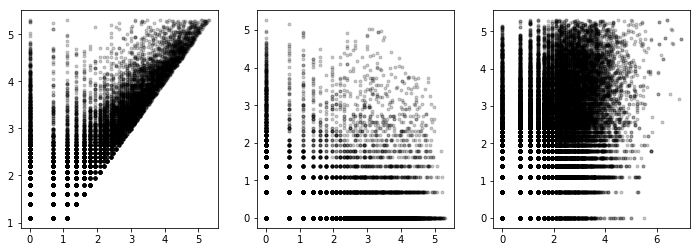

In [23]:
nusers = 20000

log_noncompany_users = noncompany_users[
    ['PushEvent_count', 'CommitCommentEvent_count',
     'DeleteEvent_count', 'GollumEvent_count', 'IssueCommentEvent_count',
     'MemberEvent_count', 'WatchEvent_count',
     'frequency', 'public_repos_count', 'public_gists_count']].apply(lambda x: np.log(x + 1))

log_noncompany_users['non_passive_events'] = (noncompany_users[:nusers].frequency -
                                              (noncompany_users[:nusers].DeleteEvent_count + 
                                               noncompany_users[:nusers].GollumEvent_count +
                                               noncompany_users[:nusers].IssueCommentEvent_count +
                                               noncompany_users[:nusers].MemberEvent_count +
                                               noncompany_users[:nusers].WatchEvent_count)
                                             ).apply(lambda x: np.log(x + 1))
log_noncompany_users['public_repos_gists'] = (noncompany_users[:nusers].public_repos_count +
                                              noncompany_users[:nusers].public_gists_count
                                             ).apply(lambda x: np.log(x + 1))

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(log_noncompany_users[:nusers].PushEvent_count, 
         log_noncompany_users[:nusers].frequency, 
         'k.', alpha=0.2)

ax[1].plot(log_noncompany_users[:nusers].PushEvent_count, 
         log_noncompany_users[:nusers].WatchEvent_count, 
         'k.', alpha=0.2)

ax[2].plot(log_noncompany_users[:nusers].public_repos_count, 
         log_noncompany_users[:nusers].frequency, 
         'k.', alpha=0.2)

ax[2].plot(log_noncompany_users[:nusers].public_repos_gists, 
           log_noncompany_users[:nusers].non_passive_events, 
           'k.', alpha=0.2)

#plt.ylim([0, 75])

### K-means clustering 

Define high and low users.

In [24]:
X = np.array([log_noncompany_users[:nusers].public_repos_gists, 
              log_noncompany_users[:nusers].non_passive_events]).T
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [25]:
labels = kmeans.predict(X)
print(labels[:5])
print(np.unique(labels))
print('{0}% labels == 0'.format(np.round(np.sum(labels == 0) / len(labels) * 100, 2)))

[1 0 0 1 0]
[0 1]
60.97% labels == 0


Text(0, 0.5, 'Log # of active events')

/home/brian/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


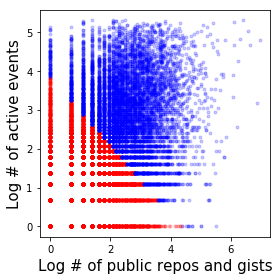

In [26]:
fsize=15
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.set_tight_layout(True)

ax.plot(log_noncompany_users[:nusers].public_repos_gists.values[labels == 0], 
             log_noncompany_users[:nusers].non_passive_events.values[labels == 0], 
               'r.', alpha=0.2)

ax.plot(log_noncompany_users[:nusers].public_repos_gists.values[labels == 1], 
             log_noncompany_users[:nusers].non_passive_events.values[labels == 1], 
               'b.', alpha=0.2)

ax.set_xlabel('Log # of public repos and gists', fontsize=fsize)
ax.set_ylabel('Log # of active events', fontsize=fsize)

### Save the KMeans model for later

In [27]:
import pickle
pickle.dump(kmeans, open('high_low_use_KMeans.pickle', 'wb'))
clf2 = pickle.load(open('high_low_use_KMeans.pickle', 'rb'))
clf2.predict(X[:5])

array([1, 0, 0, 1, 0], dtype=int32)